In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


In [25]:
#Read in the wine data
data = pd.read_csv("wine-data.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [26]:
data["type"] = data["type"].apply(lambda t: 0 if t == "red" else 1)
data["type"].value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [27]:
from sklearn.preprocessing import MinMaxScaler
s = MinMaxScaler()
s.fit(data)
data_scaled = s.transform(data)

In [28]:
# Convert the data into three principal components
pca = PCA(n_components=3)
pca.fit(data_scaled)
data_t = pd.DataFrame(data=pca.transform(data_scaled))
pd.DataFrame(data=data_t)

,0,1,2
0,0.838037,-0.141354,-0.257124
1,0.826095,-0.154614,-0.108839
2,0.823429,-0.135882,-0.113518
3,0.770277,-0.082417,0.321439
4,0.838037,-0.141354,-0.257124
...,...,...,...
6492,-0.243179,0.152653,-0.074536
6493,-0.275964,-0.205656,-0.038784
6494,-0.263186,-0.098490,0.054350
6495,-0.263096,0.428485,-0.107555


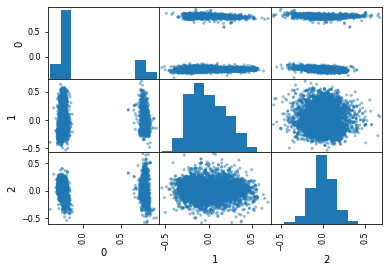

In [29]:
# We see clustering between components 1 and 2.
_ = pd.plotting.scatter_matrix(data_t)

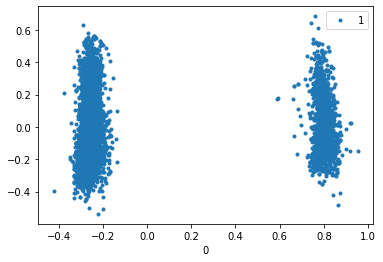

In [7]:
data_t[[0,1]].plot(x=0, y=1, linestyle="none", marker=".")

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
scores = []
data_clustering = data_t[[0,1]]
for i in range(2, 10):
    model= KMeans(n_clusters=i)
    model.fit(data_clustering)
    s=silhouette_score(data_clustering, model.labels_)
    scores.append(s)

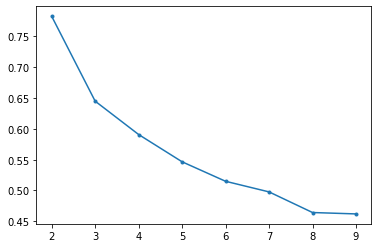

In [31]:
plt.plot(range(2,10), scores, marker=".")

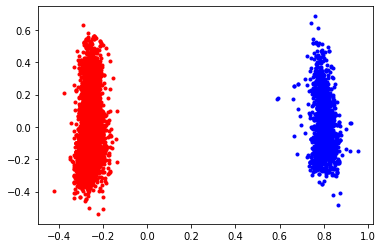

In [33]:
# k = 2 looks optimal. Fit the model with 2 clusters and plot the two clusters.
model = KMeans(n_clusters=2)
model.fit(data_clustering)
model.labels_

plt.plot(data_clustering[model.labels_ == 0][0], data_clustering[model.labels_ == 0][1],
        linestyle="none", marker=".", color="red")
plt.plot(data_clustering[model.labels_ == 1][0], data_clustering[model.labels_ == 1][1],
        linestyle="none", marker=".", color="blue")

These two clusters correspond to the two splashes of points between 